In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [5]:
# Завантажуємо дані 
data_2d = pd.read_csv('data/data_2d.csv', header=None)
print(data_2d.head())

     0         1         2
0  0.0 -0.768716  0.460860
1  0.0  2.687848  2.366961
2  0.0 -0.201379  0.470430
3  0.0  0.608496  1.225400
4  0.0 -0.082282  1.137218


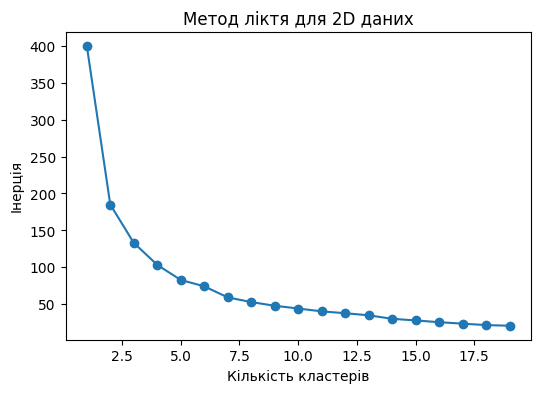

In [34]:
#  KMeans
X_2d = data_2d.iloc[:, 1:].values  

scaler = StandardScaler()
X_2d_scaled = scaler.fit_transform(X_2d)

# Визначення оптимальної кількості кластерів за допомогою ліктевого методу
inertia = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_2d_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 20), inertia, marker='o')
plt.title('Метод ліктя для 2D даних')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.show()

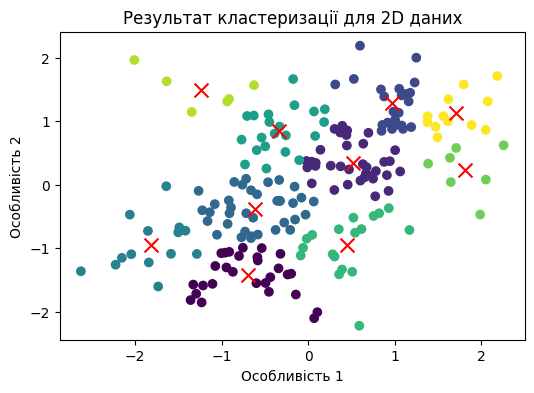

In [35]:
kmeans_2d = KMeans(n_clusters=10, random_state=42)
y_kmeans_2d = kmeans_2d.fit_predict(X_2d_scaled)

# Візуалізація результату
plt.figure(figsize=(6, 4))
plt.scatter(X_2d_scaled[:, 0], X_2d_scaled[:, 1], c=y_kmeans_2d, cmap='viridis')
plt.scatter(kmeans_2d.cluster_centers_[:, 0], kmeans_2d.cluster_centers_[:, 1], s=100, c='red', marker='x')
plt.title('Результат кластеризації для 2D даних')
plt.xlabel('Особливість 1')
plt.ylabel('Особливість 2')
plt.show()

In [8]:
# Завантажуємо дані
mnist_data = pd.read_csv('data/mnist.csv', header=None)
print(mnist_data.head())

   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0    7    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    2    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    4    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   779  780  781  782  783  784  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 785 columns]


In [29]:
# 2. Кластеризація для MNIST (з PCA)
X_mnist = mnist_data.values

# зменшуємо розмірність за допомогою PCA до 2-х вимірів
pca = PCA(n_components=2)
X_mnist_pca = pca.fit_transform(X_mnist)

print(X_mnist_pca[:5])

[[ -280.48284077   449.28087951]
 [  -71.90372767 -1045.77432637]
 [ -967.81881497  -348.41094945]
 [ 1054.43501096  -353.10257509]
 [  419.03766405   673.04868354]]


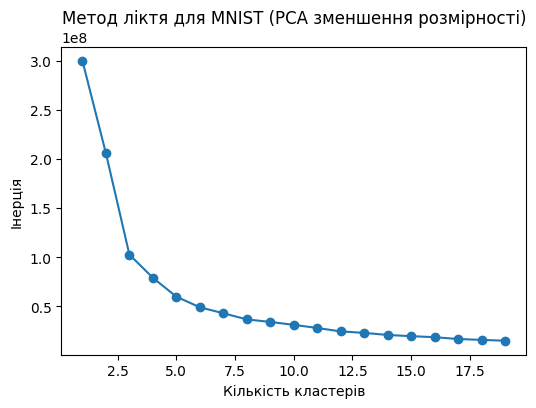

In [36]:
inertia_mnist = []
for k in range(1, 20):
    kmeans_mnist = KMeans(n_clusters=k, random_state=42)
    kmeans_mnist.fit(X_mnist_pca)
    inertia_mnist.append(kmeans_mnist.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 20), inertia_mnist, marker='o')
plt.title('Метод ліктя для MNIST (PCA зменшення розмірності)')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.show()

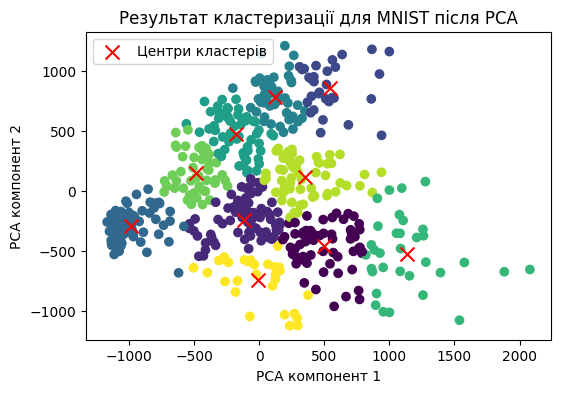

In [38]:
kmeans_mnist = KMeans(n_clusters=10, random_state=42)
y_kmeans_mnist = kmeans_mnist.fit_predict(X_mnist_pca)

plt.figure(figsize=(6, 4))
plt.scatter(X_mnist_pca[:, 0], X_mnist_pca[:, 1], c=y_kmeans_mnist, cmap='viridis')
plt.scatter(kmeans_mnist.cluster_centers_[:, 0], kmeans_mnist.cluster_centers_[:, 1], s=100, c='red', marker='x', label='Центри кластерів')
plt.title('Результат кластеризації для MNIST після PCA')
plt.xlabel('PCA компонент 1')
plt.ylabel('PCA компонент 2')
plt.legend()
plt.show()